In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
df = pd.read_csv('C:/Users/hoang/Downloads/benhthan/dataset/dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   bp        200 non-null    int64 
 1   bp limit  200 non-null    int64 
 2   sg        200 non-null    object
 3   al        200 non-null    object
 4   class     200 non-null    object
 5   rbc       200 non-null    int64 
 6   su        200 non-null    object
 7   pc        200 non-null    int64 
 8   pcc       200 non-null    int64 
 9   ba        200 non-null    int64 
 10  bgr       200 non-null    object
 11  bu        200 non-null    object
 12  sod       200 non-null    object
 13  sc        200 non-null    object
 14  pot       200 non-null    object
 15  hemo      200 non-null    object
 16  pcv       200 non-null    object
 17  rbcc      200 non-null    object
 18  wbcc      200 non-null    object
 19  htn       200 non-null    int64 
 20  dm        200 non-null    int64 
 21  cad       200 no

In [3]:
df.head()

,bp,bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1-Jan,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
3,1,1,1.009 - 1.011,3-Mar,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
4,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,20-Dec


## Làm sạch dữ liệu


In [ ]:


# Hàm chuyển đổi chuỗi có khoảng giá trị thành số trung bình
def convert_range_to_mean(value):
    if isinstance(value, str):
        if ' - ' in value:  # Khoảng giá trị kiểu 'a - b'
            try:
                lower, upper = value.split(' - ')
                return (float(lower) + float(upper)) / 2
            except ValueError:
                return np.nan
        elif '≤' in value:  # Giá trị nhỏ nhất
            return float(value.replace('≤', '').strip())
        elif '≥' in value:  # Giá trị lớn nhất
            return float(value.replace('≥', '').strip())
    return value

# Hàm làm sạch cho cột giá trị kiểu chuỗi, nếu có '<' thì giảm giá trị đi 1
def clean_grf(value):
    if isinstance(value, str):
        if value.startswith('<'):
            return float(value.replace('<', '').strip()) - 1
        else:
            try:
                return float(value)
            except ValueError:
                return np.nan
    return value

# Các cột cần chuyển đổi khoảng giá trị thành giá trị trung bình
cols_to_convert = ['bp', 'bp limit', 'sg', 'al', 'rbc', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'age', 'grf']

# Áp dụng chuyển đổi cho các cột có khoảng giá trị
for col in cols_to_convert:
    if col in df.columns:
        df[col] = df[col].apply(convert_range_to_mean)

# Từ điển thay thế các giá trị trong các cột
replacement_mapping = {
    'su': {'4-Apr': 4, '2-Feb': 2, '4-Mar': 4, '3-Mar': 3, '2-Jan': 2, '< 0': 0, '≥ 4': 4},
    'al': {'1-Jan': 1, '2-Feb': 2, '3-Mar': 3, '≥ 4': 4, '< 0': 0},
    'class': {'ckd': 1, 'notckd': 0},
    'age': {'20-Dec': 20},
    'stage': {'s1': 1, 's2': 2, 's3': 3, 's4': 4, 's5': 5}
}

# Áp dụng thay thế cho các cột trong replacement_mapping
for col, mapping in replacement_mapping.items():
    if col in df.columns:
        df[col] = df[col].replace(mapping)

# Áp dụng hàm làm sạch cho các cột có giá trị dạng chuỗi cần làm sạch
columns_to_clean = ['grf', 'sg', 'bgr', 'bu', 'pot', 'hemo', 'pcv', 'wbcc', 'sc', 'sod', 'rbcc']
for col in columns_to_clean:
    if col in df.columns:
        df[col] = df[col].apply(clean_grf)

# Áp dụng hàm làm sạch cho cột 'age'
df['age'] = df['age'].apply(clean_grf)

# Các cột cần loại bỏ
columns_to_drop = ['meta', 'affected', 'appet', 'bp limit', 'pe']

# Kiểm tra các cột trong DataFrame
print("Các cột trong DataFrame:", df.columns)

# Loại bỏ các cột không cần thiết (với errors='ignore' để tránh lỗi nếu cột không tồn tại)
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# In ra DataFrame sau khi loại bỏ cột
print(df_cleaned.head())

# Xuất DataFrame đã làm sạch ra file CSV
df_cleaned.to_csv('cleaned_data.csv', index=False)


Các cột trong DataFrame: Index(['bp', 'bp limit', 'sg', 'al', 'class', 'rbc', 'su', 'pc', 'pcc', 'ba',
       'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'htn',
       'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage', 'affected', 'age'],
      dtype='object')
   bp     sg   al  class  rbc   su  pc  pcc  ba    bgr  ...    pcv   rbcc  \
0   0  1.020  1.0      1    0  0.0   0    0   0  111.0  ...  35.45  4.755   
1   0  1.010  0.0      1    0  0.0   0    0   0  133.0  ...  35.45  4.755   
2   0  1.010  4.0      1    1  0.0   1    0   1  111.0  ...  31.55  4.755   
3   1  1.010  3.0      1    0  0.0   0    0   0  133.0  ...  43.25  4.755   
4   0  1.016  0.0      1    0  0.0   0    0   0  175.0  ...  39.35  5.345   

      wbcc  htn  dm  cad  ane       grf  stage   age  
0   8550.0    0   0    0    0  227.9440      1  11.0  
1  13310.0    0   0    0    0  227.9440      1  11.0  
2  15690.0    0   0    0    0  139.8635      1  11.0  
3   8550.0    0   0    0    0  139.8

C:\Users\hoang\AppData\Local\Temp\ipykernel_14392\2313316225.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(mapping)


In [5]:
df_cleaned = df_cleaned.astype('int')

In [6]:
print(df_cleaned.columns.tolist())

['bp', 'sg', 'al', 'class', 'rbc', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'htn', 'dm', 'cad', 'ane', 'grf', 'stage', 'age']


In [7]:
# Di chuyển cột "class" xuống cuối
column_to_move = 'class'
df_cleaned = df_cleaned[[col for col in df_cleaned.columns if col != column_to_move] + [column_to_move]]

In [8]:
df_cleaned.head()

,bp,sg,al,rbc,su,pc,pcc,ba,bgr,bu,...,rbcc,wbcc,htn,dm,cad,ane,grf,stage,age,class
0,0,1,1,0,0,0,0,0,111,47,...,4,8550,0,0,0,0,227,1,11,1
1,0,1,0,0,0,0,0,0,133,47,...,4,13310,0,0,0,0,227,1,11,1
2,0,1,4,1,0,1,0,1,111,67,...,4,15690,0,0,0,0,139,1,11,1
3,1,1,3,0,0,0,0,0,133,47,...,4,8550,0,0,0,0,139,1,11,1
4,0,1,0,0,0,0,0,0,175,47,...,5,8550,0,1,0,0,139,1,20,1


class
1    128
0     72
Name: count, dtype: int64


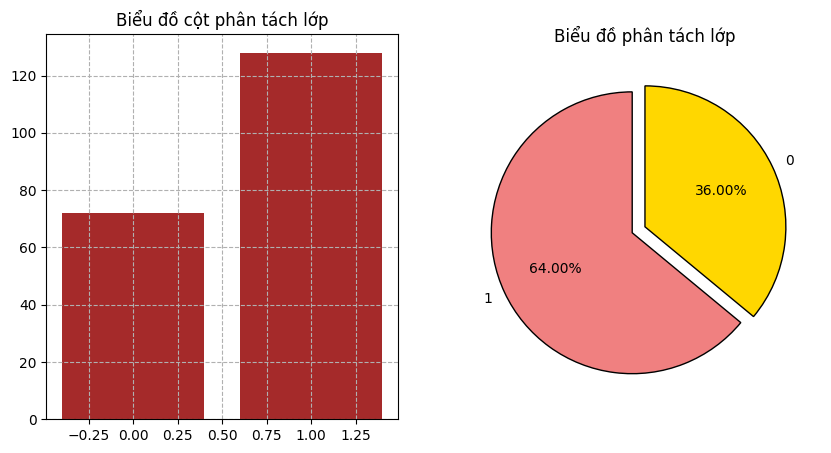

In [9]:
# Kiểm tra cân bằng dữ liệu
check = df_cleaned['class'].value_counts()
print(check)

# Trực quan hóa dữ liệu
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Biểu đồ cột
plt.subplot(1, 2, 1)
plt.bar(check.index, check.values, color='brown')
plt.grid(ls='--')
plt.title('Biểu đồ cột phân tách lớp')

# Biểu đồ tròn
plt.subplot(1, 2, 2)
colors = ['lightcoral', 'gold', 'skyblue', 'lightgreen']  # Màu sắc tùy chỉnh
explode = [0.1 if value == max(check.values) else 0 for value in check.values]  # Làm nổi bật phần lớn nhất

# Vẽ biểu đồ tròn và lưu lại wedges (phần biểu đồ)
wedges, texts, autotexts = plt.pie(
    check.values,
    labels=check.index,
    autopct='%.2f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Biểu đồ phân tách lớp')
plt.show()

## Xác định hệ số tương quan trong tập dữ liệu

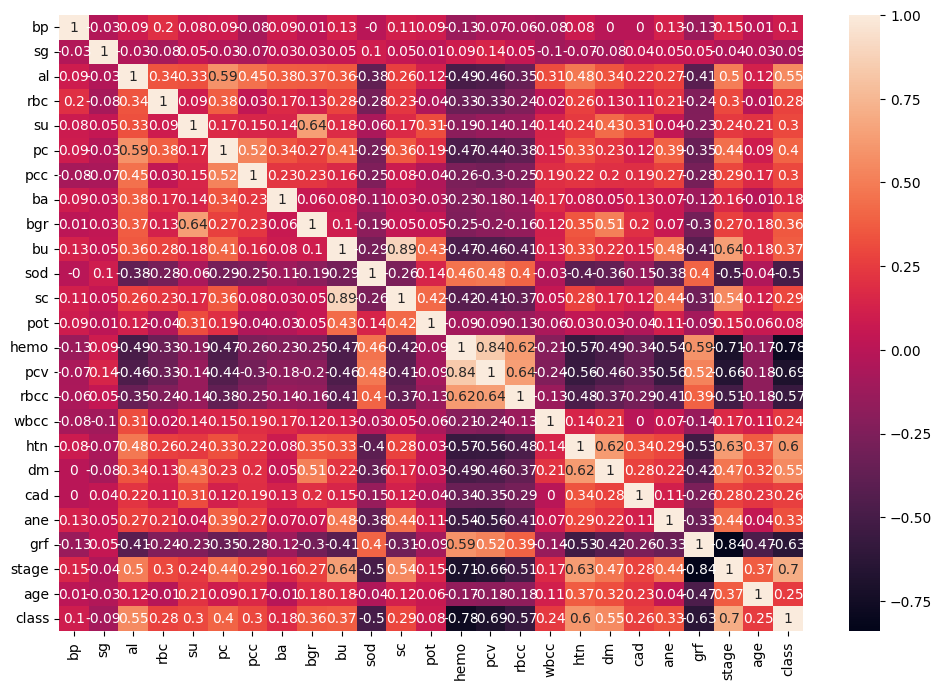

In [10]:
#Xác định hệ số tương quan trong tập dữ liệu
import seaborn as sns
correlation_matrix = df_cleaned.corr().round(2)
# annot = Đúng để in các giá trị bên trong hình vuông
plt.figure(figsize=(12,8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

## Từ ma trận tương quan cho thấy các biến 'sod', 'hemo', 'pcv', 'rbcc', 'grf' có tỉ lệ tương quan cao so với biến 'class'
**=> Đưa các biến 'sod', 'hemo', 'pcv', 'rbcc', 'grf' vào mô hình huấn luyện**

In [11]:
print(df_cleaned.columns.tolist())

['bp', 'sg', 'al', 'rbc', 'su', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc', 'wbcc', 'htn', 'dm', 'cad', 'ane', 'grf', 'stage', 'age', 'class']


In [12]:
# Tách lấy biến độc lập -Đầu vào của mô hình X:
X = df_cleaned.loc[:,['sod', 'hemo', 'pcv', 'rbcc', 'grf']].values
X

array([[140,  11,  35,   4, 227],
       [135,  11,  35,   4, 227],
       [135,   9,  31,   4, 139],
       [135,  14,  43,   4, 139],
       [135,  14,  39,   5, 139],
       [135,  16,  49,   5, 114],
       [140,  10,  31,   3, 190],
       [135,  11,  39,   4,  39],
       [135,  14,  39,   5,  39],
       [125,   8,  23,   4,  64],
       [140,  13,  43,   6,  89],
       [140,  15,  47,   5, 165],
       [145,  11,  39,   6,  89],
       [135,  11,  43,   4,  89],
       [135,  15,  43,   4,  39],
       [135,  13,  47,   4, 215],
       [135,  15,  39,   5, 215],
       [125,  11,  39,   4,  25],
       [145,  11,  43,   6, 165],
       [145,  14,  43,   5,  89],
       [140,  16,  49,   4, 215],
       [145,  14,  43,   5, 139],
       [150,  13,  43,   5, 114],
       [117,   5,  16,   2,  25],
       [140,  16,  49,   5,  64],
       [140,  15,  49,   5, 114],
       [135,  11,  35,   4, 114],
       [135,  13,  43,   4, 165],
       [145,  16,  47,   5, 190],
       [145,  

In [13]:
y = df_cleaned.loc[:,'class'].values
y

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1])

In [14]:
#Thực hiện tách theo tỷ lệ 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, shuffle=True) 
print('Tổng số mẫu dữ liệu   :', len(y))
print('Số mẫu trong tập Train:',len(y_train))
print('Số mẫu trong tập Test :',len(y_test))

Tổng số mẫu dữ liệu   : 200
Số mẫu trong tập Train: 160
Số mẫu trong tập Test : 40


## Xây dụng mô hình hồi quy logistic

In [15]:
from sklearn.linear_model import LogisticRegression
# Khởi tạo và huấn luyện mô hình
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [18]:
#Sử dụng mô hình huấn luyện dự đoán trên tập dữ liệu Test: Model.predict(X_test)
y_pred = model.predict(X_test)
#So sánh kết quả dự đoán với kết quả thật với 20 hành bn đầu tiên:
print('Giá trị thật         :', y_test[:20])
print('Mô hình dự đoán.     :', y_pred[:20])

Giá trị thật         : [0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0]
Mô hình dự đoán.     : [0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0]


In [19]:
#1. Đếm tổng số mẫu dự đoán đúng trên tập Test: normalize=False
acc_test = accuracy_score(y_test,y_pred, normalize=False)

print('Tổng số mẫu trong tập test:', len(y_test))
print('Số mẫu dự đoán đúng       :', acc_test)
print('Số mẫu dự đoán sai        :', len(y_test) - acc_test)

Tổng số mẫu trong tập test: 40
Số mẫu dự đoán đúng       : 38.0
Số mẫu dự đoán sai        : 2.0


In [20]:
#Độ chính xác của Model trên tập Huấn luyện: Model.score(X_train,y_train)
acc1_train =model.score(X_train,y_train)
print('Độ chính xác trên tập train:',acc1_train)
print('độ chính xác trên tập train(%)', round(acc1_train*100,2),'(%)')

Độ chính xác trên tập train: 0.95
độ chính xác trên tập train(%) 95.0 (%)


Confusion matrix - partient:
[[16  1]
 [ 1 22]]


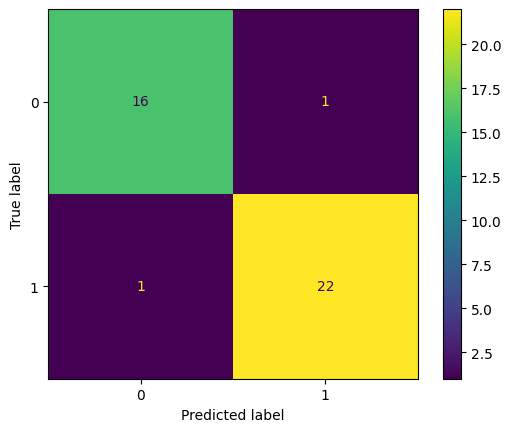

In [21]:
#3.Sử dụng ma trận confussion matrix kiểm tra kết quả:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Tính toán ma trận
cnf_matrix_partient = confusion_matrix(y_test,y_pred)

#Hiển thị ma trân:
print('Confusion matrix - partient:')
print(cnf_matrix_partient)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [22]:
# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9500


ROC-AUC Score: 0.9847


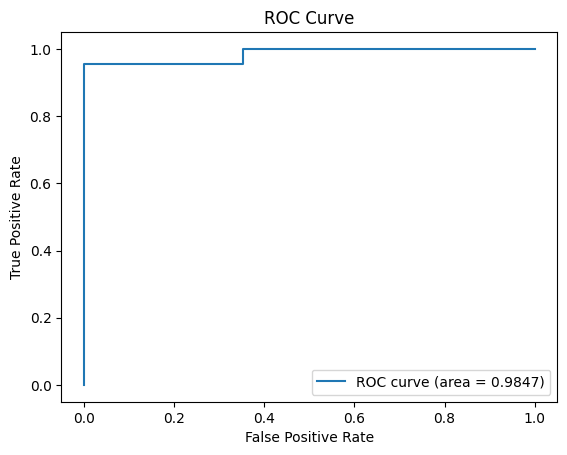

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Tính ROC-AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Xác suất dự đoán cho lớp 1
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Vẽ đồ thị ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.4f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


**Dự đoán với dữu liệu bệnh nhân mới vào mô hình xây dựng được**


- Bệnh nhân 1 có các thông số như sau:
    * sod (Có thể từ < 112 đến > 148)              
    * hemo (Khoảng 11.3 - 15.2)                     
    * pcv (Khoảng 33.5 - 45.2)                   
    * rbcc (Khoảng 4.46 - 5.05 triệu tế bào/μL)  
    * grf (Giá trị có thể ≥ 227.944)               

In [52]:

# Nhập thông số của bệnh nhân 1
sod = float(input("Nhập giá trị sod: "))  # Sodium
hemo = float(input("Nhập giá trị hemo: "))  # Hemoglobin
pcv = float(input("Nhập giá trị pcv: "))  # Hematocrit
rbcc = float(input("Nhập giá trị rbcc: "))  # Red Blood Cell Count
grf = float(input("Nhập giá trị grf: "))  # Glomerular Filtration Rate

# In kết quả kiểm tra
print(f"\nKết quả kiểm tra các thông số của bệnh nhân:")
print(f"Sodium ({sod})")
print(f"Hemoglobin ({hemo})")
print(f"Hematocrit ({pcv})")
print(f"Red Blood Cell Count ({rbcc})")
print(f"Glomerular Filtration Rate ({grf})")



Kết quả kiểm tra các thông số của bệnh nhân:
Sodium (0.0)
Hemoglobin (0.0)
Hematocrit (0.0)
Red Blood Cell Count (0.0)
Glomerular Filtration Rate (0.0)


In [53]:
if sod and hemo and pcv and rbcc and grf:
    # Chuyển các giá trị hợp lệ thành DataFrame để đưa vào mô hình
    patient_data = np.array([[sod, hemo, pcv, rbcc, grf]])
    # Dự đoán kết quả cho bệnh nhân
    pred_patient1 = model.predict(patient_data)
    print(f"\nKết quả dự đoán cho bệnh nhân: {'Bệnh nhân có vấn đề sức khỏe' if pred_patient1 == 1 else 'Bệnh nhân khỏe mạnh'}")